In [121]:
# Homework 2 Part 1 (due 7/07/2024)

# Multivariate linear regression with within-sample validation

### Objective
In this project, you will identify relationships between variables via single-variable and multivariable linear regression using the python library `sci-kit learn`. You will practice assessing the model fit within sample and out of sample.

### Step 1
The following code snippet (1) loads the diabetes dataset from the sci-kit learn package, (2) fits a linear regression to the first variable in that data set, (3) calculate a t statistics for the estimated model parameters, (4) calculates the within-sample R2, and (5) plots the data and the model. Review and test the code.

### Step 2
Write code that  fits a linear models for EACH INDEPENDENT VARIABLE in the data set. For each of the resulting models, (1) calculate a t statistic for the estimated model parameters, (2) calculate the within-sample RSS, MSE, RSE, and R^2. Plot the results for the model that has the best quality of fit.

### Step 3
Write code that  fits a multivariate linear model for ALL INDEPENDENT VARIABLE in the data set. (1) calculate an f statistic on the estimated model parameters, (2) calculate the within-sample RSS, MSE, RSE, and R^2.

### Step 4
Test the information content of each variable in the multivariate model by calculating an f statistic with respect to a reduced model. Are the three variables with the highest f statistic also the variables with the best-fitting single-variable models? Explain what may lead to differences in the variable rankings.

### Step 5
Look up how to use the function `train_test_split` from `sklearn.model_selection` split a dataset into a training set and a test set. Repeat steps 2 and 3 on the training set. For each model, also calculate RSS, MSE, RSE, and R2 on the test set. For each linear model, comment on how RSE and R2 change when moving from the training set to the test. 

In [122]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [123]:
# Read-in the diabetes dataset as a pandas DataFrame
diabetes = datasets.load_diabetes(as_frame=True)

# Get independent variables
X = diabetes.data

# Get dependent variable
y = diabetes.target

# Let's look at the data
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


var_names:  Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')
var_name1:  age
yHat:  [163.71553045 151.56100659 178.07996773 125.04204544 153.77092002
 123.93708873 138.30152602 171.45022745 164.82048716 130.56682902
 122.83213202 160.4006603  157.08579016 153.77092002 165.92544388
 136.09161259 150.45604987 173.66014088 140.51143945 143.82630959
 137.1965693  126.14700216 126.14700216 165.92544388 132.77674244
 131.67178573 119.51726187 144.9312663  168.1353573  172.55518416
 133.88169916 144.9312663  162.61057373 161.50561702 157.08579016
 167.03040059 155.98083345 149.35109316 151.56100659 151.56100659
 153.77092002 121.7271753  133.88169916 158.19074688 165.92544388
 160.4006603  134.98665587 128.35691559 172.55518416 139.40648273
 162.61057373 170.34527073 136.09161259 149.35109316 137.1965693
 139.40648273 139.40648273 143.82630959 164.82048716 171.45022745
 130.56682902 139.40648273 143.82630959 141.61639616 172.55518416
 138.30152602 149.351

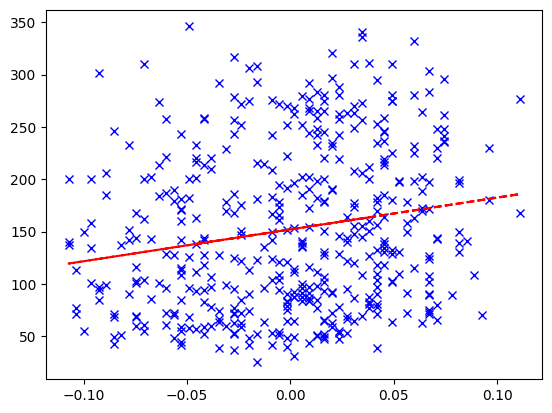

In [124]:
# initialize model
model = LinearRegression()

# get variable names from column header in the data frame
var_names = X.columns

print("var_names: ", var_names)
# select first variable
var_name1 = var_names[0]

print("var_name1: ", var_name1)

# select data associated with the first variable
x1 = X[var_name1]

# turn that dataframe column into a nx1 numpy array
x1_data = np.array([x1.to_numpy()]).T

# fit model
_ = model.fit(x1_data,y.to_numpy())

# get model predictions for each x value
yHat = model.predict(x1_data)

print ("yHat: ", yHat)

# get residuals
resid = yHat-y

# get R2 value
R2 = model.score(x1_data,y)
print('R2', R2)

# make a plot
plt.subplot(111)

# plot data
plt.plot(x1, y, marker='x', lw=0, color='blue')

# plot fit
plt.plot(x1, yHat, ls='--', color='red')




age
R2:  0.03530218264671636
mean:  [-1.44429466e-18]
RSS:  2528481.781604897
len_x:  442
MSE:  5720.54701720565
RSE:  75.80599912703146
tStat:  152.13348416289588
sex
R2:  0.0018543357106460823
mean:  [2.54321451e-18]
RSS:  2616148.8936170232
len_x:  442
MSE:  5918.888899586025
RSE:  77.10896796118263
tStat:  152.1334841628958
bmi
R2:  0.3439237602253802
mean:  [-2.25592546e-16]
RSS:  1719581.8107738832
len_x:  442
MSE:  3890.4565854612742
RSE:  62.51512200285266
tStat:  152.13348416289597
bp
R2:  0.1949061431435003
mean:  [-4.85408596e-17]
RSS:  2110158.3448469606
len_x:  442
MSE:  4774.113902368689
RSE:  69.25181889385094
tStat:  152.133484162896
s1
R2:  0.04495353245556555
mean:  [-1.4285958e-17]
RSS:  2503185.5056927954
len_x:  442
MSE:  5663.315623739356
RSE:  75.42584416155796
tStat:  152.13348416289602
s2
R2:  0.030294651136685613
mean:  [3.89881064e-17]
RSS:  2541606.567383578
len_x:  442
MSE:  5750.241102677778
RSE:  76.00249050021587
tStat:  152.13348416289588
s3
R2:  0.1558

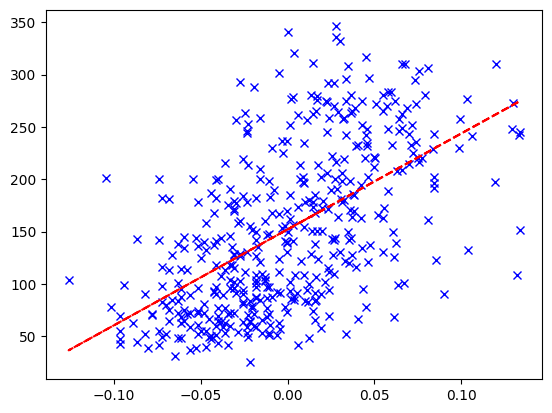

In [125]:
var_names = X.columns

for i in range(len(var_names)-1):
    model2 = LinearRegression()
    
    var_name = var_names[i]
    print(var_name)
    
    x = X[var_name]
    
    x_data = np.array([x.to_numpy()]).T
    
    _ = model2.fit(x_data,y.to_numpy())
    
    yHat = model2.predict(x_data)
    
    resid = yHat-y
    
    # calculate RSS 
    R2 = model2.score(x_data,y)
    print('R2: ', R2)
    
    # calculate the mean value 
    mean = sum(x_data)/len(x_data)
    print('mean: ', mean)

    # calculate RSS
    RSS = sum(resid*resid)
    print ("RSS: ", RSS)
    
    # calculate  MSE 
    MSE = RSS/len(x_data)
    print("len_x: ", len(x_data))
    print("MSE: ", MSE)
    
    # calculate RSE 
    RSE = np.sqrt(RSS/(len(resid)-2))
    print("RSE: ", RSE)
    
    model.get_params()
    
    # calculate t statistic 
    b1 = model.intercept_
    standardDev = np.std(x_data)
    rootn = np.sqrt(len(x1_data))
    tstat = (b1/standardDev/rootn)
    print("tStat: ", tstat)
    

model3 = LinearRegression()
    
var_name = var_names[8]
print(var_name)
    
x2 = X[var_name]
    
x2_data = np.array([x2.to_numpy()]).T
    
_ = model3.fit(x2_data,y.to_numpy())
    
yHat = model3.predict(x2_data)
    
resid = yHat-y

# make a plot
plt.subplot(111)

# plot data
plt.plot(x2, y, marker='x', lw=0, color='blue')

# plot fit
plt.plot(x2, yHat, ls='--', color='red')
    
 

Step 3: Multivariate linear model 

In [126]:

multiModel = LinearRegression()

data = []


for name in var_names:
    col = X[name]
    col_data = np.array([col.to_numpy()]).T
    
    data.append(col_data)


X_data = np.array(data).T

_ = multiModel.fit(X_data,y.to_numpy())


# calculate an f-statistic 
## what is f statistic?? how to model?



# calculate the within-sample RSS, MSE, RSE, and R^2.

yHat = multiModel.predict(X)
mResid = yHat - y

# calculate the R2 value
mR2 = model.score(X,y)
print("mR2: ", mR2)


# calculate the RSS
mRSS = sum (mResid*mResid)
print ("mRss: ", mRSS)


# calculate MSE: 
### how do I calculate MSE in multi model? Is it the # of elements in the whole matrix? 
mMSE = mRSS/len(mResid)
print("mMSE: ", mMSE)

# calculate RSE
mRSE = np.sqrt(mRSS/(len(mResid)-2))
print("mMSE: ", mMSE)






















ValueError: Found array with dim 3. LinearRegression expected <= 2.